<a href="https://colab.research.google.com/github/eric-r-xu/DiscardWisdom/blob/main/HKMahjong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
..................................................
..................................................
..................................................
..................................................
..................................................
..................................................
..................................................
..................................................
..................................................
..................................................
..................................................
..................................................
..................................................
..................................................


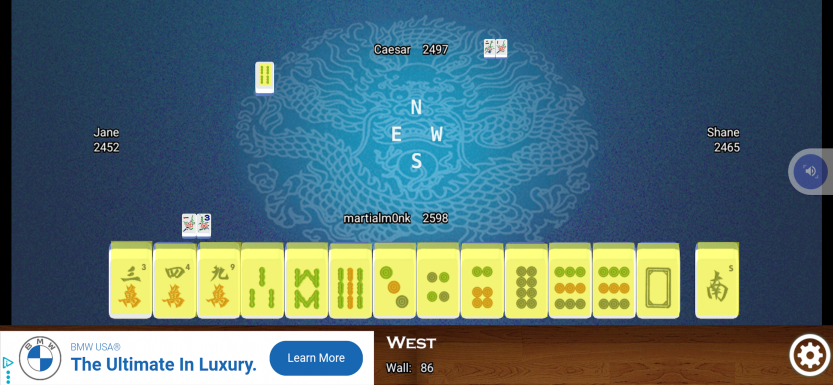


Potential scores if each tile is discarded:

3b: 30.5
3c: 30.5
3d: 30.5
4c: 30.5
4d: 30.5
6b: 30.5
6d: 30.5
8b: 30.5
8d: 30.5
9c: 30.5
9d: 33
swh: 33.5
wdh: 33.5
predicted least useful tile = 4d with score: 30.5


In [15]:
import cv2
import sys
from collections import defaultdict
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
sys.path.append('/content/drive/MyDrive/mahjong')

from image_utils import show_image, init_screenshot, find_and_mark_locations
from file_utils import load_template_files, initialize_all_tiles
from mahjong_checker import MahjongHandChecker



screenshot_path = "/content/drive/MyDrive/mahjong/examples/1.png"
template_dir = "/content/drive/MyDrive/mahjong/hkmj_tile_templates/"

template_files = load_template_files(template_dir)

image, match_mask = init_screenshot(screenshot_path)
overlay = image.copy()
templates = {file: cv2.imread(file) for file in template_files}

tiles_found = defaultdict(int)
collective = defaultdict(int)
player_you = defaultdict(int)

for template_path, template_image in templates.items():
    _template_id = template_path.split("/")[-3:]
    _player, _type, _tile = (
        _template_id[0],
        _template_id[1],
        _template_id[2].replace(".png", ""),
    )
    if template_image is None:
        print(f"Error: Could not read the template image at {template_path}")
        continue
    found_tiles = find_and_mark_locations(template_image, image, overlay, match_mask)
    if found_tiles > 0:
        print('..................................................')
        tiles_found[_tile] += found_tiles
        if _player == 'player_you':
            player_you[_tile] += found_tiles
        if _player == 'collective':
            collective[_tile] += found_tiles

highlight_image = cv2.addWeighted(overlay, 0.5, image, 0.5, 0)
show_image(highlight_image, 0.3)

all_tiles = initialize_all_tiles()

for tile, num_tiles in collective.items():
    all_tiles[tile] -= num_tiles

checker = MahjongHandChecker(player_you, all_tiles)

least_useful_tile, least_useful_score, all_discards = checker.suggest_discard()
print("\nPotential scores if each tile is discarded:\n")
for tile, score in sorted(all_discards.items()):
    print(f"{tile}: {score}")

print(f'predicted least useful tile = {least_useful_tile} with score: {least_useful_score}')
